<a href="https://colab.research.google.com/github/nasiksami/Deep-Learning/blob/main/Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.kaggle.com/shrutimechlearn/churn-modelling/notebooks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [3]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Feature Scaling -  it is very important for the neural networks
#all the inputs should be in same range 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(6, kernel_initializer='he_uniform',activation='relu'))

model.add(keras.layers.Dense(6,  kernel_initializer='he_uniform',activation='relu'))

model.add(keras.layers.Dense(1,  kernel_initializer='glorot_uniform',activation='sigmoid'))

In [18]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [22]:
# Fitting the ANN to the Training set
model_history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7548 - val_loss: 0.4656 - val_accuracy: 0.7970
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.8065 - val_loss: 0.4469 - val_accuracy: 0.7963
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4356 - accuracy: 0.8093 - val_loss: 0.4410 - val_accuracy: 0.7997
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4277 - accuracy: 0.8093 - val_loss: 0.4371 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4220 - accuracy: 0.8164 - val_loss: 0.4324 - val_accuracy: 0.8122
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4173 - accuracy: 0.8214 - val_loss: 0.4283 - val_accuracy: 0.8137
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4135 - accuracy: 0.8261 - val_loss: 0.4251 - val_accuracy: 0.8213

In [24]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


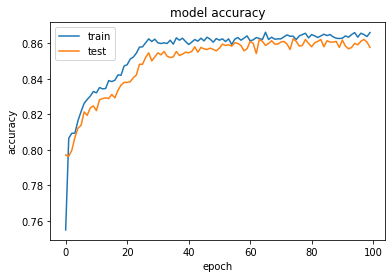

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()